In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\nlp\imdb_movies.csv')

In [33]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [35]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [36]:
df[['genre', 'crew']] = df[['genre', 'crew']].fillna('Unknown', inplace=False)


In [37]:
df.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
from skimpy import skim

In [40]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10178  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃           ┃           ┃    ┃          ┃           ┃           ┃           ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean      ┃ sd        ┃ p0 ┃ p25      ┃ p50       ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ score     │  0 │    0 │      63.5 │     13.54 │  0 │       59 │        65 │        71 │       100 │   ▁▇▇  │  │
│ │ budget_x  │  0 │    0 │  64880000 │  57080000 │  1 │ 15000000 │  50000000 │ 105000000 │ 460000000 │  ▇▅▁   │  │
│ │ revenue   │  0 │    0 │ 253100000 │ 277800000 │  0 │ 28590000 │ 152900000 │ 417800000 │ 292400000 │   ▇▂   │  │
│ │           │    │      │           │           │    │          │           │           │         0 │        │  │
│ └───────────┴────┴──────┴───────────┴───────────┴────┴──────────┴───────────┴───────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ names                     │       0 │          0 │                          3.1 │                    31604 │  │
│ │ date_x                    │       0 │          0 │                            2 │                    20356 │  │
│ │ genre                     │       0 │          0 │                          1.1 │                    11651 │  │
│ │ overview                  │       0 │          0 │                           48 │                   489687 │  │
│ │ crew                      │       0 │          0 │                           34 │                   349447 │  │
│ │ orig_title                │       0 │          0 │                            3 │                    30827 │  │
│ │ status                    │       0 │          0 │                            2 │                    20403 │  │
│ │ orig_lang                 │       0 │          0 │                            2 │                    20785 │  │
│ │ country                   │       0 │          0 │                            1 │                    10178 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

EDA

Release status distribution:
 status
Released           10131
Post Production       31
In Production         16
Name: count, dtype: int64


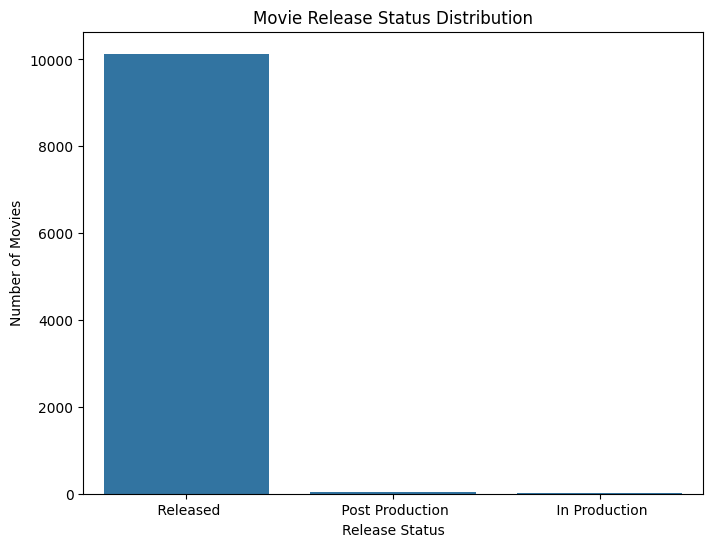

In [41]:
# Distribution of movie release status
release_status_count = df['status'].value_counts()
print("Release status distribution:\n", release_status_count)

# Plot the release status distribution
plt.figure(figsize=(8,6))
sns.barplot(x=release_status_count.index, y=release_status_count.values)
plt.title('Movie Release Status Distribution')
plt.xlabel('Release Status')
plt.ylabel('Number of Movies')
plt.show()


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_13556\3104250871.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Release_year'], bins=40))['names'].agg('count').plot(kind='bar', color=colors)


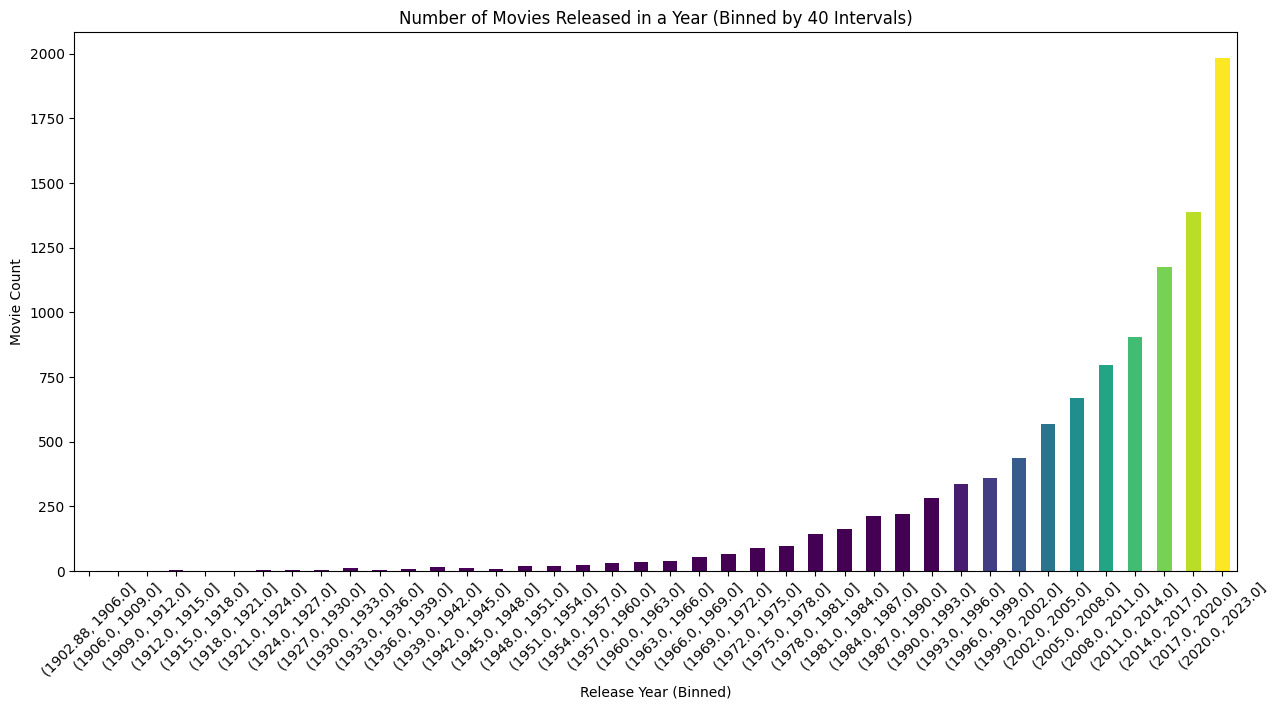

In [42]:

# Assuming you have a Release_year column
df['Release_year'] = pd.to_datetime(df['date_x']).dt.year

# Color combination using viridis colormap
colors = plt.cm.viridis(np.linspace(-3, 1, 40))

# Plot the number of movies released per year
plt.figure(figsize=(15,7))
df.groupby(pd.cut(df['Release_year'], bins=40))['names'].agg('count').plot(kind='bar', color=colors)

# Adding titles and labels
plt.title("Number of Movies Released in a Year (Binned by 40 Intervals)")
plt.ylabel("Movie Count")
plt.xlabel("Release Year (Binned)")
plt.xticks(rotation=45)

# Show the plot
plt.show()


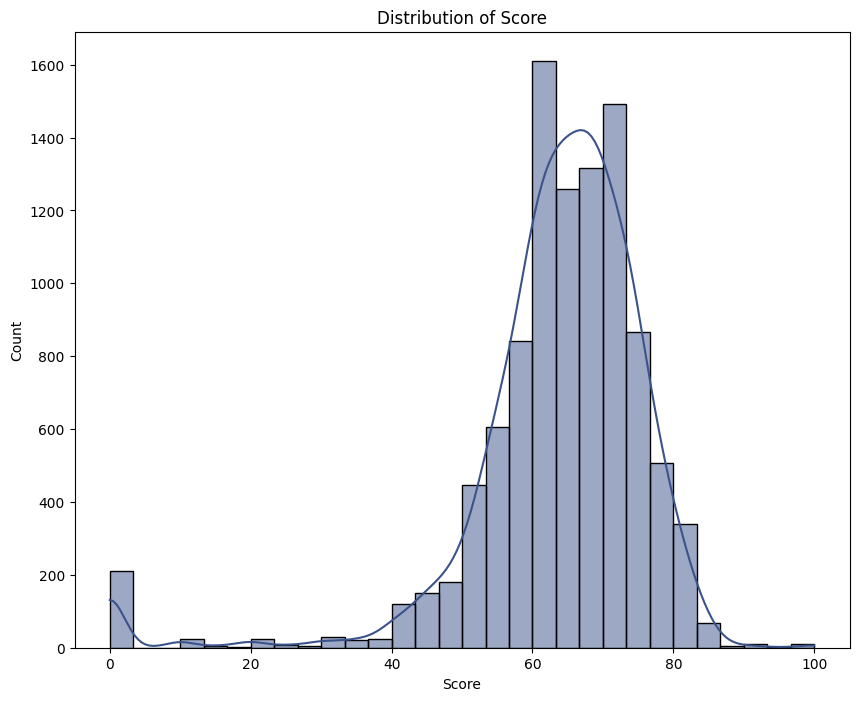

In [43]:
colors = plt.cm.viridis(np.linspace(0,1,40))
plt.figure(figsize=(10,8))
sns.histplot(df['score'],bins=30,kde=True,color=colors[10])
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [44]:
top_revenue_movies = df[['orig_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
print("Top 10 highest-grossing movies:\n", top_revenue_movies)


Top 10 highest-grossing movies:
                                 orig_title       revenue
68                                  Avatar  2.923706e+09
230                      Avengers: Endgame  2.794732e+09
1                 Avatar: The Way of Water  2.316795e+09
309                                Titanic  2.222986e+09
6670                               Titanic  2.222986e+09
4483  Louis Tomlinson: All of Those Voices  2.081794e+09
943           Star Wars: The Force Awakens  2.068224e+09
104                 Avengers: Infinity War  2.048360e+09
5683                         Rathinirvedam  1.916347e+09
76                 Spider-Man: No Way Home  1.910048e+09


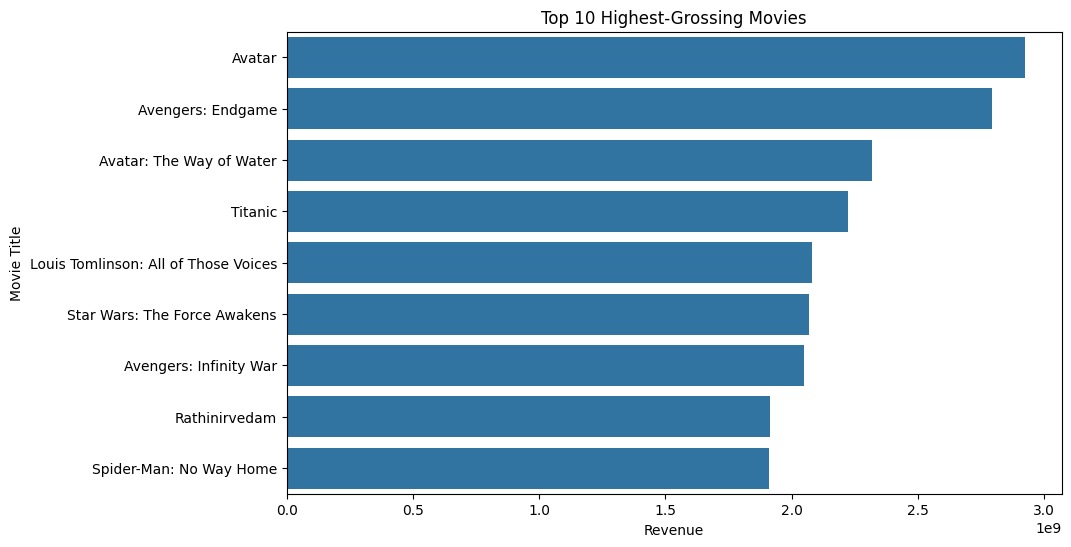

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='orig_title', data=top_revenue_movies)
plt.title('Top 10 Highest-Grossing Movies')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()

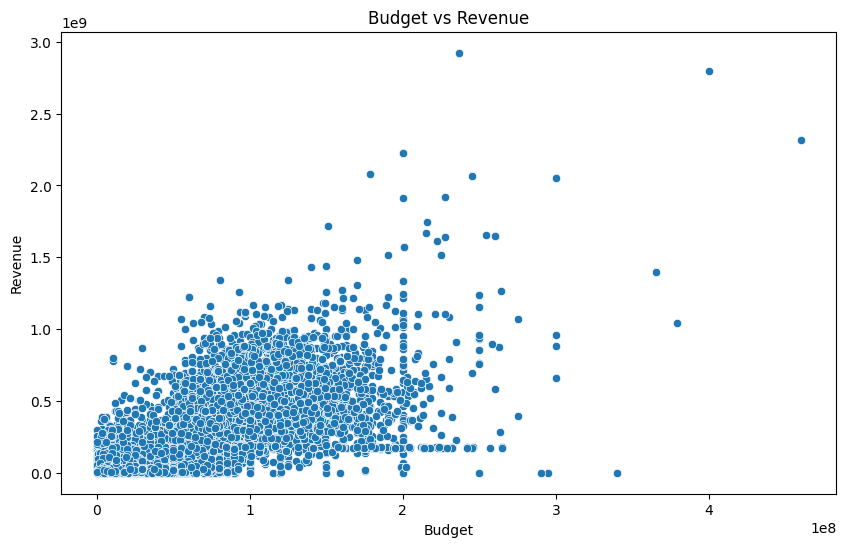

In [46]:
# Scatter plot: Budget vs Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget_x', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


In [47]:
df['genre']=df['genre'].str.split(',')
df_genre=df.explode('genre')

genre_count=df_genre.value_counts()
print("Number of movies by genre:\n", genre_count)

Number of movies by genre:
 names                          date_x       score  genre             overview                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     crew                                                                                                                                                                                                                      

Language distribution of movies:
 orig_lang
English               7417
Japanese               714
Spanish, Castilian     397
Korean                 388
French                 285
Chinese                153
Cantonese              145
Italian                142
German                  93
Russian                 66
Name: count, dtype: int64


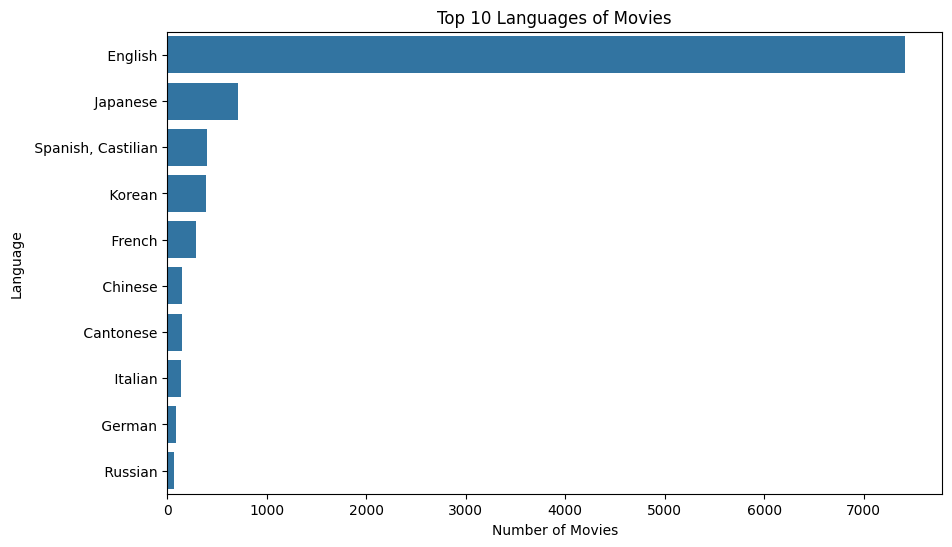

In [50]:
# Language distribution of movies
language_distribution = df['orig_lang'].value_counts().head(10)
print("Language distribution of movies:\n", language_distribution)

# Plot the language distribution
plt.figure(figsize=(10,6))
sns.barplot(x=language_distribution.values, y=language_distribution.index)
plt.title('Top 10 Languages of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.show()


Release status distribution:
 status
Released           10131
Post Production       31
In Production         16
Name: count, dtype: int64


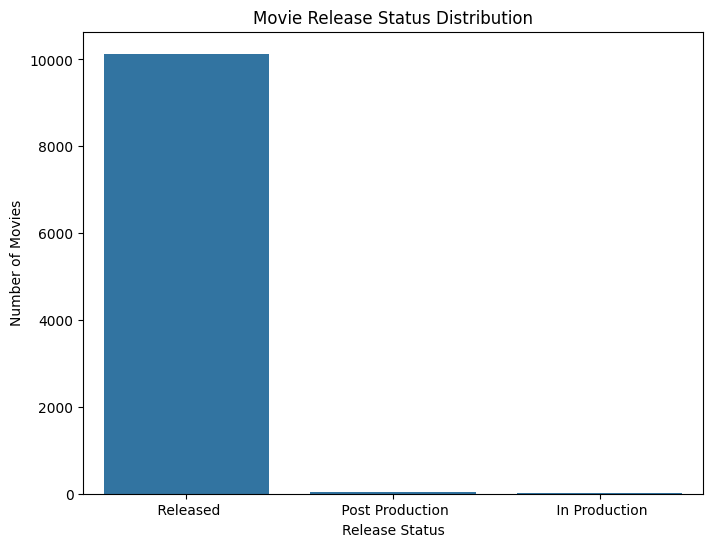

In [51]:
# Distribution of movie release status
release_status_count = df['status'].value_counts()
print("Release status distribution:\n", release_status_count)

# Plot the release status distribution
plt.figure(figsize=(8,6))
sns.barplot(x=release_status_count.index, y=release_status_count.values)
plt.title('Movie Release Status Distribution')
plt.xlabel('Release Status')
plt.ylabel('Number of Movies')
plt.show()


Country-wise movie count:
 country
AU    4885
US    2750
JP     538
KR     361
FR     222
GB     174
ES     153
HK     125
IT     123
MX     105
Name: count, dtype: int64


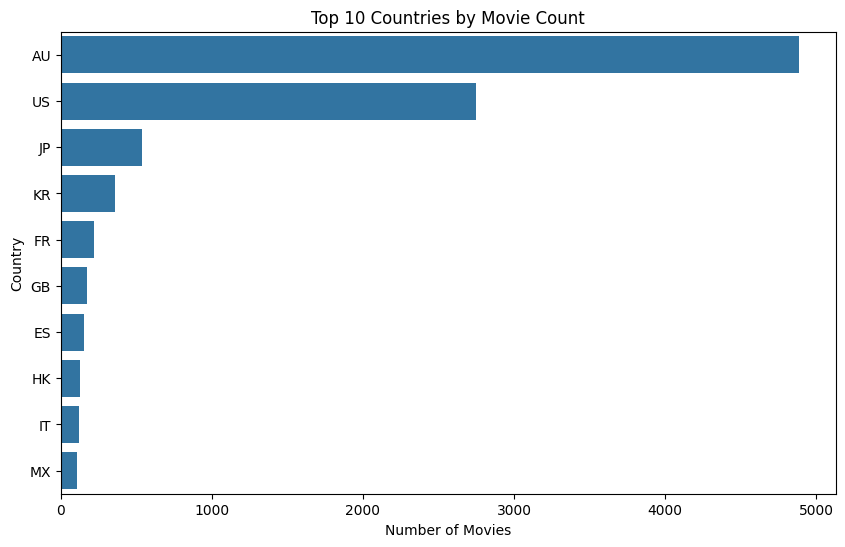

In [52]:
# Country-wise count of movies
country_count = df['country'].value_counts().head(10)
print("Country-wise movie count:\n", country_count)

# Plot the country-wise movie count
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Countries by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()


In [54]:
numeric_df=df.select_dtypes(include=[np.number])

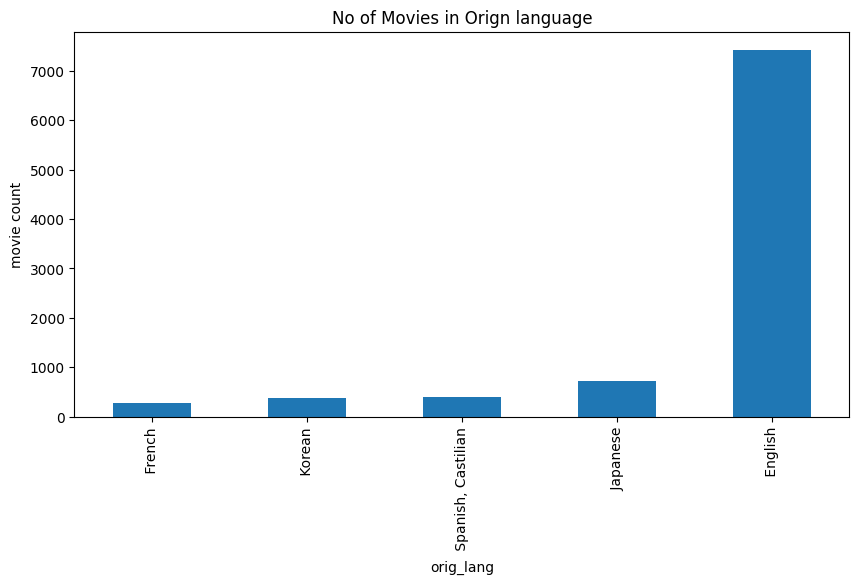

In [57]:
# plot between no of movies in their orgin language
plt.figure(figsize=(10,5))
df.groupby("orig_lang")["names"].agg("count").sort_values().tail(5).plot(kind="bar")
plt.title("No of Movies in Orign language")
plt.ylabel("movie count")
plt.show()

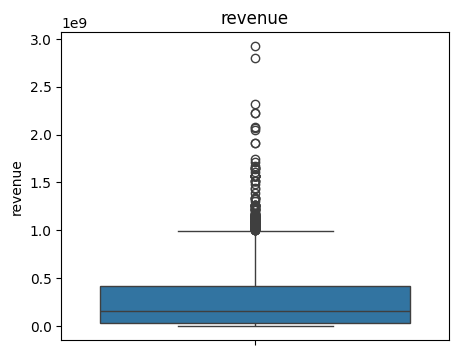

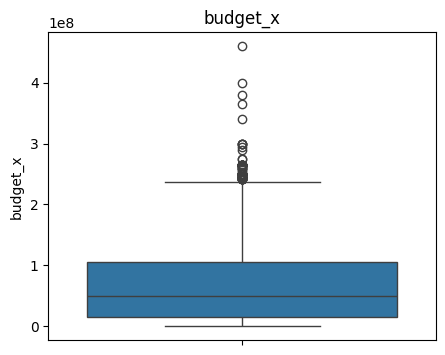

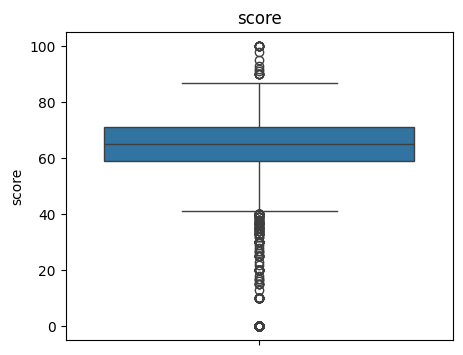

In [58]:
for i in df[["revenue","budget_x","score"]]:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()